In [124]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure
# pip install scikit-image

In [150]:
image_pixels = io.imread("images/car-number-2.jpg")
image_pixels.shape

(1991, 4634, 3)

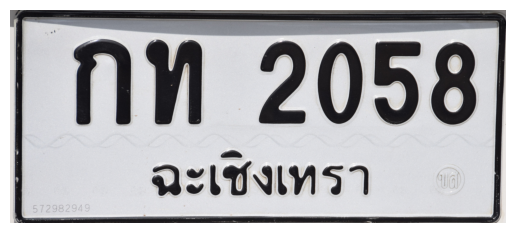

In [151]:
plt.imshow(image_pixels, cmap="gray")
plt.axis("off")
plt.show()

In [152]:
if image_pixels.shape[-1] == 4:
    image_pixels = image_pixels[..., :3]  # discard alpha

In [153]:
gray_img = color.rgb2gray(image_pixels)
gray_img[30:]

array([[0.47645922, 0.47645922, 0.47253765, ..., 0.5010898 , 0.5010898 ,
        0.5010898 ],
       [0.46861608, 0.47253765, 0.47253765, ..., 0.50501137, 0.49716824,
        0.49716824],
       [0.46861608, 0.47253765, 0.47645922, ..., 0.49324667, 0.49716824,
        0.49716824],
       ...,
       [0.87307333, 0.87307333, 0.87307333, ..., 0.91399333, 0.9179149 ,
        0.9179149 ],
       [0.87307333, 0.87307333, 0.87307333, ..., 0.91399333, 0.9179149 ,
        0.9179149 ],
       [0.87307333, 0.87307333, 0.87307333, ..., 0.91399333, 0.91399333,
        0.91399333]], shape=(1961, 4634))

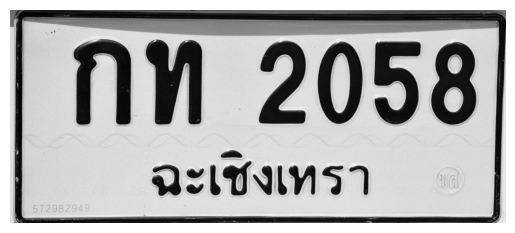

In [154]:
plt.imshow(gray_img, cmap="gray")
plt.axis("off")
plt.show()

In [155]:
edge_sobel = filters.sobel(gray_img)
edge_sobel.shape

(1991, 4634)

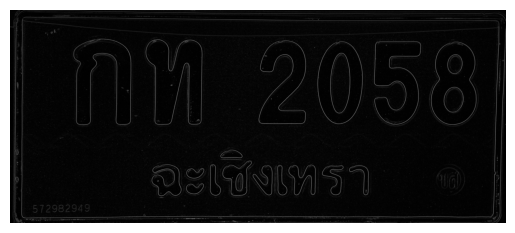

In [156]:
from skimage.util import img_as_ubyte

io.imsave("images/edge_sobel.png", img_as_ubyte(edge_sobel))

plt.imshow(edge_sobel, cmap="gray")
plt.axis("off")
plt.show()

In [157]:
threshold = 0.2
edges = edge_sobel > threshold
edges[100:110, 550:570]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [Fa

In [158]:
edge_pixel_indices = np.nonzero(edges)
edge_pixel_indices

(array([  82,   82,   82, ..., 1989, 1989, 1989], shape=(81313,)),
 array([ 851,  852,  853, ..., 2500, 3388, 3389], shape=(81313,)))

In [159]:
edges[104, 572]

np.False_

In [160]:
edge_points = np.column_stack(np.nonzero(edges))
edge_points[:3]

array([[ 82, 851],
       [ 82, 852],
       [ 82, 853]])

In [161]:
contours = measure.find_contours(edges, level=0.5)
contours

[array([[ 82.5, 857. ],
        [ 82.5, 856. ],
        [ 82.5, 855. ],
        [ 82.5, 854. ],
        [ 82.5, 853. ],
        [ 82.5, 852. ],
        [ 82.5, 851. ],
        [ 82. , 850.5],
        [ 81.5, 851. ],
        [ 81.5, 852. ],
        [ 81.5, 853. ],
        [ 81.5, 854. ],
        [ 81.5, 855. ],
        [ 81.5, 856. ],
        [ 81.5, 857. ],
        [ 82. , 857.5],
        [ 82.5, 857. ]]),
 array([[ 83.5, 896. ],
        [ 83. , 895.5],
        [ 82.5, 896. ],
        [ 83. , 896.5],
        [ 83.5, 896. ]]),
 array([[ 83.5, 934. ],
        [ 83.5, 933. ],
        [ 83. , 932.5],
        [ 82.5, 933. ],
        [ 82.5, 934. ],
        [ 83. , 934.5],
        [ 83.5, 934. ]]),
 array([[ 84.5, 997. ],
        [ 84. , 996.5],
        [ 83.5, 997. ],
        [ 84. , 997.5],
        [ 84.5, 997. ]]),
 array([[  84.5, 1010. ],
        [  84.5, 1009. ],
        [  84.5, 1008. ],
        [  84. , 1007.5],
        [  83.5, 1008. ],
        [  83.5, 1009. ],
        [  83.5, 101

In [162]:
test_cont = contours[2]
test_cont.shape

(7, 2)

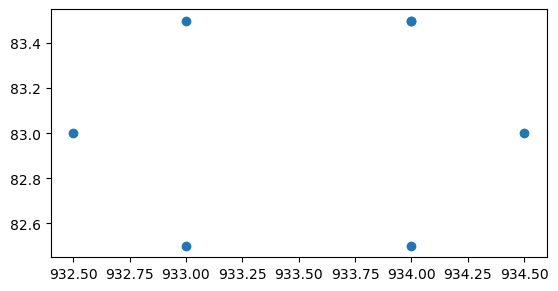

In [163]:
# plot the contour points
plt.plot(test_cont[:, 1], test_cont[:, 0], 'o')
plt.axis('image')
plt.show()

In [164]:
largest_countour_idx = 0
largest_countour_cnt = -1
for i, contour in enumerate(contours):
    n_points = contour.shape[0]
    if n_points < 20:
        continue

    if n_points > largest_countour_cnt:
        largest_countour_cnt = n_points
        largest_countour_idx = i
        print(f"New largest contour: {n_points}")

        y_vals = contour[:, 0]
        x_vals = contour[:, 1]

x_vals.shape, y_vals.shape

New largest contour: 27
New largest contour: 35
New largest contour: 57
New largest contour: 61
New largest contour: 79
New largest contour: 81
New largest contour: 221
New largest contour: 2841
New largest contour: 2907
New largest contour: 4321
New largest contour: 6827


((6827,), (6827,))

In [165]:
t = np.arange(len(y_vals))
n = len(t)
n, t

(6827, array([   0,    1,    2, ..., 6824, 6825, 6826], shape=(6827,)))

In [166]:
max_n = 500

if n > max_n:
    y_vals = y_vals[::int(n/max_n)]
    x_vals = x_vals[::int(n/max_n)]
    n = len(x_vals)
    t = np.arange(n)
y_vals, y_vals, t

(array([1074.5, 1074.5, 1073.5, 1071.5, 1067.5, 1061.5, 1053. , 1042. ,
        1029. , 1016. , 1004. ,  993. ,  980. ,  968. ,  955. ,  942. ,
         930. ,  917. ,  904. ,  892. ,  879. ,  866. ,  854. ,  841. ,
         828. ,  815. ,  803. ,  792. ,  779. ,  766. ,  753. ,  740. ,
         727. ,  714. ,  701. ,  688. ,  675. ,  662. ,  649. ,  636. ,
         623. ,  610. ,  597. ,  584. ,  571. ,  559. ,  547. ,  536. ,
         528. ,  521.5,  516. ,  511. ,  505.5,  499.5,  493.5,  487. ,
         480. ,  472. ,  464. ,  455. ,  446. ,  436. ,  426. ,  414. ,
         403. ,  390. ,  379. ,  368. ,  358. ,  349. ,  340. ,  339.5,
         349. ,  358. ,  368. ,  379. ,  390. ,  403. ,  416. ,  427. ,
         437.5,  447. ,  456. ,  464.5,  473. ,  480.5,  487.5,  494. ,
         500.5,  506. ,  511. ,  516. ,  522. ,  528.5,  537. ,  548. ,
         561. ,  573. ,  586. ,  599. ,  612. ,  625. ,  638. ,  651. ,
         662.5,  674. ,  686. ,  698. ,  710. ,  722. ,  734. , 

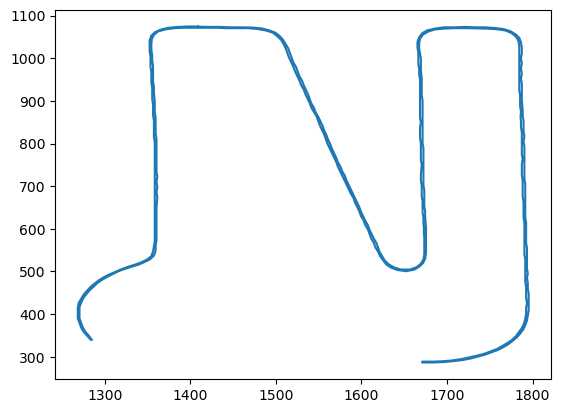

In [167]:
plt.plot(x_vals, y_vals)
plt.show()

In [168]:
# poly_n = n-1
# coeffs_x = np.polyfit(t, x_vals, deg=poly_n)
# coeffs_y = np.polyfit(t, y_vals, deg=poly_n)
# n, t

In [169]:
# t_for_plot = np.linspace(0, n-1, 300)
# x_poly = np.polyval(coeffs_x, t_for_plot)
# y_poly = np.polyval(coeffs_y, t_for_plot)
# t_for_plot, x_poly, y_poly

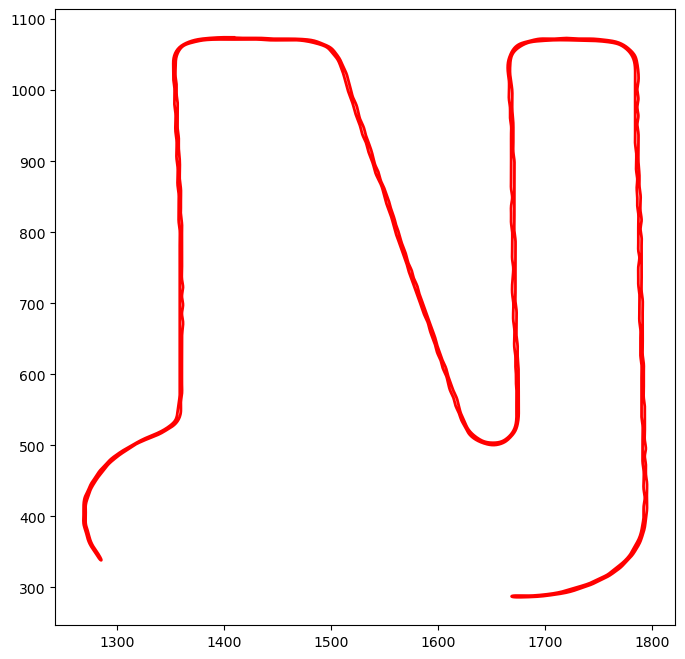

In [170]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x_poly, y_poly, color="red", linewidth=2)

In [171]:
# pip install scipy
from scipy.interpolate import CubicSpline

In [172]:
sx = CubicSpline(t, x_vals, bc_type="natural")
sy = CubicSpline(t, y_vals, bc_type="natural")

In [173]:
t_for_plot = np.linspace(0, n-1, 5000)
x_poly = sx(t_for_plot)
y_poly = sy(t_for_plot)

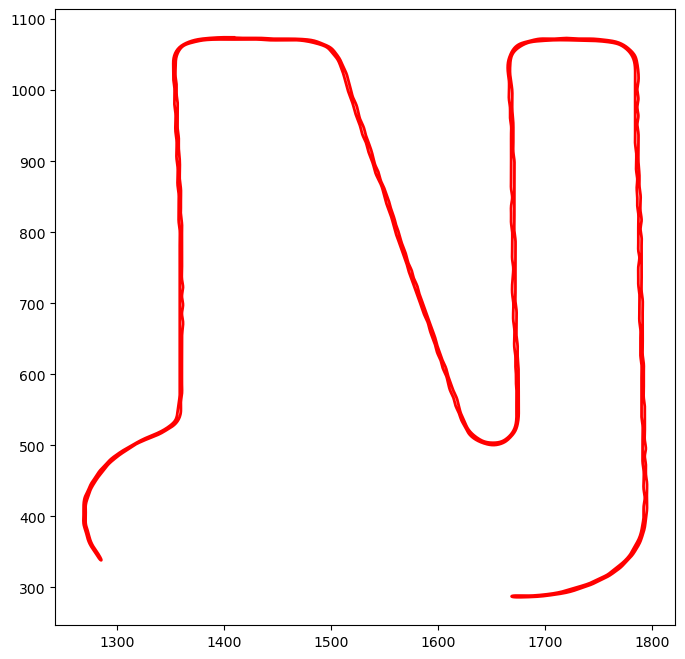

In [174]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x_poly, y_poly, color="red", linewidth=2)